# Sigmoid & Softmax Playground (matplotlib sliders)
This notebook contains interactive sliders to explore **sigmoid** and **softmax** using only `matplotlib`.

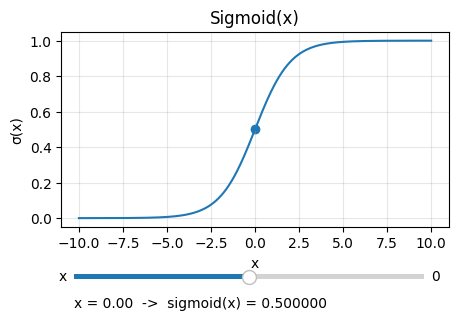

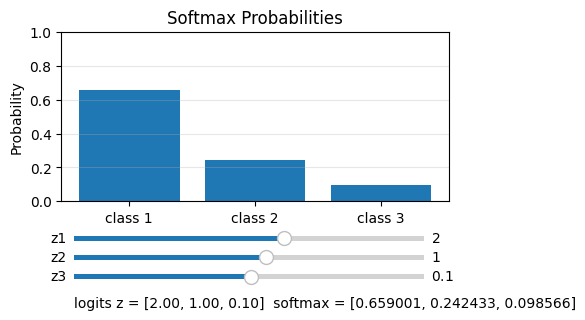

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def softmax(z):
    z = np.array(z, dtype=float)
    z = z - np.max(z)
    expz = np.exp(z)
    return expz / np.sum(expz)

# Sigmoid figure
xs = np.linspace(-10, 10, 400)
ys = sigmoid(xs)
fig1, ax1 = plt.subplots(figsize=(5,3.2))
plt.subplots_adjust(bottom=0.27)
line1, = ax1.plot(xs, ys)
pt1 = ax1.scatter([0],[sigmoid(0)])
ax1.set_title('Sigmoid(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('σ(x)')
ax1.grid(True, alpha=0.3)
sig_ax = plt.axes([0.15, 0.10, 0.7, 0.03])
sig_slider = Slider(sig_ax, 'x', -10.0, 10.0, valinit=0.0, valstep=0.1)
text1 = plt.figtext(0.15, 0.02, f"x = {0.0:.2f}  ->  sigmoid(x) = {sigmoid(0.0):.6f}")
def on_sig_update(val):
    xv = sig_slider.val
    yv = sigmoid(xv)
    pt1.set_offsets([[xv,yv]])
    text1.set_text(f"x = {xv:.2f}  ->  sigmoid(x) = {yv:.6f}")
    fig1.canvas.draw_idle()
sig_slider.on_changed(on_sig_update)
plt.show()

# Softmax figure
fig2, ax2 = plt.subplots(figsize=(5,3.2))
plt.subplots_adjust(bottom=0.35)
init_logits = np.array([2.0, 1.0, 0.1])
p = softmax(init_logits)
bars = ax2.bar(['class 1','class 2','class 3'], p)
ax2.set_ylim(0,1)
ax2.set_title('Softmax Probabilities')
ax2.set_ylabel('Probability')
ax2.grid(axis='y', alpha=0.3)
ax_z1 = plt.axes([0.15, 0.22, 0.7, 0.03])
ax_z2 = plt.axes([0.15, 0.16, 0.7, 0.03])
ax_z3 = plt.axes([0.15, 0.10, 0.7, 0.03])
sl_z1 = Slider(ax_z1, 'z1', -10.0, 10.0, valinit=init_logits[0], valstep=0.1)
sl_z2 = Slider(ax_z2, 'z2', -10.0, 10.0, valinit=init_logits[1], valstep=0.1)
sl_z3 = Slider(ax_z3, 'z3', -10.0, 10.0, valinit=init_logits[2], valstep=0.1)
text2 = plt.figtext(0.15, 0.02, f"logits z = [{init_logits[0]:.2f}, {init_logits[1]:.2f}, {init_logits[2]:.2f}]  "
                                f"softmax = [{p[0]:.6f}, {p[1]:.6f}, {p[2]:.6f}]")
def on_softmax_update(val):
    z = np.array([sl_z1.val, sl_z2.val, sl_z3.val])
    pr = softmax(z)
    for b, newh in zip(bars, pr):
        b.set_height(newh)
    text2.set_text(f"logits z = [{z[0]:.2f}, {z[1]:.2f}, {z[2]:.2f}]  "
                   f"softmax = [{pr[0]:.6f}, {pr[1]:.6f}, {pr[2]:.6f}]")
    fig2.canvas.draw_idle()
for sl in (sl_z1, sl_z2, sl_z3):
    sl.on_changed(on_softmax_update)
plt.show()
